No handles with labels found to put in legend.


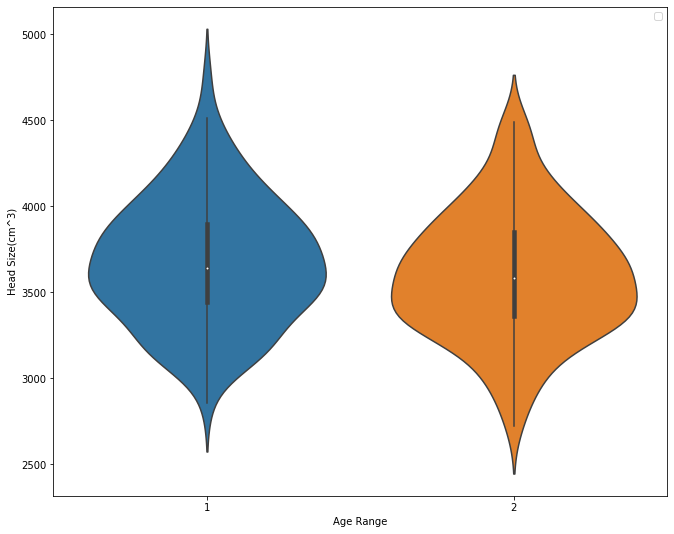

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import filedialog
from tkinter import *
%matplotlib inline

def del_col():
    global dataset
    dataset.dropna(axis=1,inplace=True)
    tk.Label(master,text="Columns Deleted Successfully").grid(row=10)


    
def del_rows():
    global dataset
    dataset.dropna(axis=0,inplace=True)
    tk.Label(master,text="Rows Deleted Successfully").grid(row=10)

   
    
def rep():
    global dataset
    dataset.fillna(np.round(dataset.mean()),inplace = True)
    tk.Label(master,text="NAN's replaced with mean").grid(row=10)
    if dataset.isnull().any().any():
        print('Nan values still remain' )
        del_col()
        tk.Label(master,text="Columns unhandled are deleted").grid(row=11)



def uploaded():
    global dataset
    master.filename = filedialog.askopenfilename(initialdir = "/",title = "Select file",filetypes = (("csv files","*.csv"),("all files","*.*")))
    dataset = pd.read_csv(master.filename)
    tk.Label(master,text="Uploaded successfully").grid(row=4)



def createhist():
    global vx,vy,dataset,w
    f, ax = plt.subplots(figsize=(11, 9))
    x=str(dataset.columns[vx.get()])
    bins=w.get()
    if bins==0:
        bins=None
    plt.hist(dataset[x],bins)
    ax.legend()
    ax.set_xlabel(x)
    return f
def createbox():
    global vx,vy,dataset
    f, ax = plt.subplots(figsize=(11, 9))
    x=str(dataset.columns[vx.get()])
    y=str(dataset.columns[vy.get()])
    sns.boxplot(x,y,data=dataset)
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return f
def createscatter():
    global vx,vy,dataset
    f, ax = plt.subplots(figsize=(11, 9))
    x=str(dataset.columns[vx.get()])
    y=str(dataset.columns[vy.get()])
    sns.scatterplot(x,y,data=dataset)
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return f
def createbar():
    global vx,vy,dataset
    f, ax = plt.subplots(figsize=(11, 9))
    x=str(dataset.columns[vx.get()])
    y=str(dataset.columns[vy.get()])
    sns.barplot(x,y,data=dataset)
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return f
def createline():
    global vx,vy,dataset
    f, ax = plt.subplots(figsize=(11, 9))
    x=str(dataset.columns[vx.get()])
    y=str(dataset.columns[vy.get()])
    sns.lineplot(x,y,data=dataset)
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return f
def createdist():
    global vx,vy,dataset
    f, ax = plt.subplots(figsize=(11, 9))
    x=str(dataset.columns[vx.get()])
    sns.distplot(dataset[x])
    ax.legend()
    ax.set_xlabel(x)
    return f
def createviolin():
    global vx,vy,dataset
    f, ax = plt.subplots(figsize=(11, 9))
    x=str(dataset.columns[vx.get()])
    y=str(dataset.columns[vy.get()])
    sns.violinplot(x,y,data=dataset)
    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    return f


def show_graph():
    global vx,vy,v,dataset
    gr = tk.Tk()
    
    if v.get()==1:
        x=str(dataset.columns[vx.get()])
        fig = createhist()
        dist = FigureCanvasTkAgg(fig, gr)
        dist.draw()
        dist.get_tk_widget().grid(row=25,column=25)
    
    if v.get()==2:
        x=str(dataset.columns[vx.get()])
        fig = createbox()
        dist = FigureCanvasTkAgg(fig, gr)
        dist.draw()
        dist.get_tk_widget().grid(row=25,column=25)
        
    if v.get()==3:
        x=str(dataset.columns[vx.get()])
        fig = createscatter()
        dist = FigureCanvasTkAgg(fig, gr)
        dist.draw()
        dist.get_tk_widget().grid(row=25,column=25)
           
    if v.get()==4:
        x=str(dataset.columns[vx.get()])
        fig = createbar()
        dist = FigureCanvasTkAgg(fig, gr)
        dist.draw()
        dist.get_tk_widget().grid(row=25,column=25)
    
    if v.get()==5:
        x=str(dataset.columns[vx.get()])
        fig = createline()
        dist = FigureCanvasTkAgg(fig, gr)
        dist.draw()
        dist.get_tk_widget().grid(row=25,column=25)
        
    if v.get()==6:
        x=str(dataset.columns[vx.get()])
        fig = createdist()
        dist = FigureCanvasTkAgg(fig, gr)
        dist.draw()
        dist.get_tk_widget().grid(row=25,column=25)
    
    if v.get()==7:
        x=str(dataset.columns[vx.get()])
        y=str(dataset.columns[vy.get()])
        fig = createviolin()
        dist = FigureCanvasTkAgg(fig, gr)
        dist.draw()
        dist.get_tk_widget().grid(row=25,column=25)
    
def close_window (): 
    master.destroy()    
 
        
def scr():
    sb = Scrollbar(master)  
    sb.pack(side = RIGHT, fill = Y)  
    mylist = Listbox(master, yscrollcommand = sb.set )  
    mylist.pack( side = LEFT )  
    sb.config( command = mylist.yview )
     
    
def handle_default():
    global dataset
    master.filename = 'F:/Datasets/headbrain.csv'
    dataset = pd.read_csv(master.filename)
    tk.Label(master,text="Default dataset uploaded").grid(row=4)



def done():
    global r,vx,vy,v,w,dataset
    r = 30
    vx = tk.IntVar()
    vy = tk.IntVar()

    if v.get() == 1:
        tk.Label(master,text="Select the column for x axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=2
            tk.Radiobutton(master, text=dataset.columns[i], variable=vx,value=i).grid(row=r+1, sticky=tk.W)
        r+=2
        tk.Label(master,text="Select the no if bins you want in histogram...").grid(row=r, column=0)
        r+=1
        w = Scale(master, from_=0, to=40, orient=HORIZONTAL)
        w.grid(row=r+1,column=0)





    if v.get() == 2:
        tk.Label(master,text="Select the column for x axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vx,value=i).grid(row=r+1, sticky=tk.W)
        r+=2
        tk.Label(master,text="Select the column for y axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vy,value=i).grid(row=r+1, sticky=tk.W)
        
           
    
    
    if v.get() == 3:
        tk.Label(master,text="Select the column for x axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vx,value=i).grid(row=r+1, sticky=tk.W)
        r+=2
        tk.Label(master,text="Select the column for y axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vy,value=i).grid(row=r+1, sticky=tk.W)  
    
    
    if v.get() == 4:
        tk.Label(master,text="Select the column for x axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vx,value=i).grid(row=r+1, sticky=tk.W)
        r+=2
        tk.Label(master,text="Select the column for y axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vy,value=i).grid(row=r+1, sticky=tk.W)
    
    
    
    
    if v.get() == 5:
        tk.Label(master,text="Select the column for x axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vx,value=i).grid(row=r+1, sticky=tk.W)
        r+=2
        tk.Label(master,text="Select the column for y axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vy,value=i).grid(row=r+1, sticky=tk.W)
    
    
    
    
    
    
    if v.get() == 6:
        tk.Label(master,text="Select the column for x axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vx,value=i).grid(row=r+1, sticky=tk.W)
        r+=2
        tk.Label(master,text="Select the no. of bins...").grid(row=r, column=0)
        r+=1
        w = Scale(master, from_=0, to=20, orient=HORIZONTAL)
        w.grid(row=r+1,column=0)
    
    
    
    
    if v.get() == 7:
        tk.Label(master,text="Select the column for x axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vx,value=i).grid(row=r+1, sticky=tk.W)
        r+=2
        tk.Label(master,text="Select the column for y axis...").grid(row=r, column=0)
        for i in range(len(dataset.columns)):
            r+=1
            tk.Radiobutton(master, text=dataset.columns[i], variable=vy,value=i).grid(row=r+1, sticky=tk.W)
  

    tk.Button(master, 
          text='Submit', 
          command= show_graph).grid(row=r+2, 
                                    column=1, 
                                    sticky=tk.W, 
                                    pady=4)
   
    
def type_graph():
    global v
    tk.Label(master,text=" Now, tell me which type of graph you want to plot??? ").grid(row=14, column=0)

    v = tk.IntVar()
    tk.Radiobutton(master, text="Histogram", variable=v, value=1).grid(row=15, sticky=tk.W)
    tk.Radiobutton(master, text="Box Plot", variable=v, value=2).grid(row=16, sticky=tk.W)
    tk.Radiobutton(master, text="Scatter Plot", variable=v, value=3).grid(row=17, sticky=tk.W)
    tk.Radiobutton(master, text="Bar Graph", variable=v, value=4).grid(row=19, sticky=tk.W)
    tk.Radiobutton(master, text="Line Plot", variable=v, value=5).grid(row=20, sticky=tk.W)
    tk.Radiobutton(master, text="Dist Plot", variable=v, value=6).grid(row=21, sticky=tk.W)
    tk.Radiobutton(master, text="Violin Plot", variable=v, value=7).grid(row=22, sticky=tk.W)
    
    tk.Button(master, 
          text='Submit ', 
          command= done).grid(row=27, 
                                    column=2, 
                                    sticky=tk.W, 
                                    pady=4)

    

master = tk.Tk()
master.attributes("-fullscreen", True)



master.configure(background = 'Pink')
button = Button (master, text = "Quit", command = close_window)
button.grid(row=200,column=0)


tk.Label(master, 
         text="Upload the dataset").grid(row=0)
tk.Label(master, 
         text="Use default dataset").grid(row=1)


tk.Button(master, 
          text='UPLOAD', 
          command= uploaded).grid(row=0, 
                                    column=1, 
                                    sticky=tk.W, 
                                    pady=4)

tk.Button(master, 
          text='DEFAULT', 
          command= handle_default).grid(row=1, 
                                    column=1, 
                                    sticky=tk.W, 
                                    pady=4)


tk.Label(master,text="Tell me how do you want to treat the null values").grid(row=8,column=0)
tk.Button(master, 
          text='Delete columns', 
          command= del_col).grid(row=8, 
                                    column=1, 
                                    sticky=tk.W, 
                                    pady=4)
tk.Button(master, 
          text='Delete rows', 
          command= del_rows).grid(row=8, 
                                    column=2, 
                                    sticky=tk.W, 
                                    pady=4)
tk.Button(master, 
          text='Replace with mean', 
          command= rep).grid(row=8, 
                                    column=3, 
                                    sticky=tk.W, 
                                    pady=4)
tk.Button(master, 
          text='Click on me for continuing', 
          command= type_graph).grid(row=8, 
                                    column=5, 
                                    sticky=tk.W, 
                                    pady=4)



tk.mainloop()